In [ ]:
import json
import uuid
import py_aas_rdf
from rdflib import Graph
import random
import rdflib
from basyx.aas import model
import basyx.aas.adapter.json
import py_aas_rdf.models.reference
from py_aas_rdf.models.submodel import Submodel, SubmodelElementChoice
from py_aas_rdf.models.property import Property
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph

random.seed(1)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.dpi"] = 150

In [ ]:
def visualize_graph(graph):
    # Convert RDF graph to NetworkX graph
    networkx_graph = rdflib_to_networkx_graph(
        graph, edge_attrs=lambda s, p, o: {"triples": [(s, p, o)]}
    )

    _, ax = plt.subplots(figsize=(max(len(graph), 9), max(len(graph) / 2, 7)))
    # Modify node attributes and labels
    node_labels = {}
    node_colors = []
    shortened_labels = {}

    for node, data in networkx_graph.nodes(data=True):
        # print(str(node), data)
        label = str(node)
        # Extract the label from the URI
        shortened_label = label.split("/")[-1][:10]

        node_labels[node] = shortened_label
        shortened_labels[node] = shortened_label

        # Change node color based on label
        if "/property" in label.lower():
            node_colors.append("red")
        elif "/submodel" in label.lower():
            node_colors.append("orange")
        elif "datatype" in label.lower():
            node_colors.append("green")
        else:
            node_colors.append("skyblue")

    # Visualize the NetworkX graph with modified attributes and custom edge labels
    pos = nx.spring_layout(networkx_graph, iterations=len(graph) * 10)
    nx.draw_networkx_nodes(
        networkx_graph, pos, node_color=node_colors, node_size=1500, ax=ax
    )

    # Display the shortened labels
    for node, (x, y) in pos.items():
        plt.text(x, y, shortened_labels[node], fontsize=8, ha="center", va="center")

    # Draw edges
    nx.draw_networkx_edges(networkx_graph, pos, ax=ax)

    # Add custom edge labels
    edge_labels = {}

    for e1, e2, data in networkx_graph.edges(data=True):
        edge_label = str(data["triples"][0][1])
        if "22-rdf-syntax-ns#type" in edge_label:
            edge_labels[(e1, e2)] = "a"
        else:
            edge_labels[(e1, e2)] = edge_label.split("/")[-1]

    # Display the shortened labels
    for node, (x, y) in pos.items():
        plt.text(x, y, shortened_labels[node], fontsize=8, ha="center", va="center")

    nx.draw_networkx_edge_labels(networkx_graph, pos, edge_labels=edge_labels, ax=ax)

    plt.title("AAS Visualization")
    plt.show()


def generate_submodel(identifier, properties):

    # Properties:

    sm = model.Submodel(identifier)

    for prop in properties:
        sm.submodel_element.add(prop)
    return sm

{
  "modelType": "Submodel",
  "id": "ScrewDriver001",
  "submodelElements": [
    {
      "idShort": "Weight",
      "modelType": "Property",
      "value": "98.0",
      "valueType": "xs:double"
    },
    {
      "idShort": "Manufacturer",
      "modelType": "Property",
      "value": "Bosch Rexroth",
      "valueType": "xs:string"
    },
    {
      "idShort": "MaxTork",
      "modelType": "Property",
      "value": "2.4",
      "valueType": "xs:double"
    },
    {
      "idShort": "MaxSpeed",
      "modelType": "Property",
      "value": "12.3",
      "valueType": "xs:double"
    }
  ]
}
@prefix aas: <https://admin-shell.io/aas/3/0/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<ScrewDriver001> a aas:Submodel ;
    <https://admin-shell.io/aas/3/0/Identifiable/id> "ScrewDriver001" ;
    <https://admin-shell.io/aas/3/0/Submodel/submodelElements> <ScrewDriver001%2Fsubmodel-elements%2FManufacturer>,
        <ScrewDriver001%2Fsubmodel-elements%2FMaxSpeed>,
        <ScrewDrive

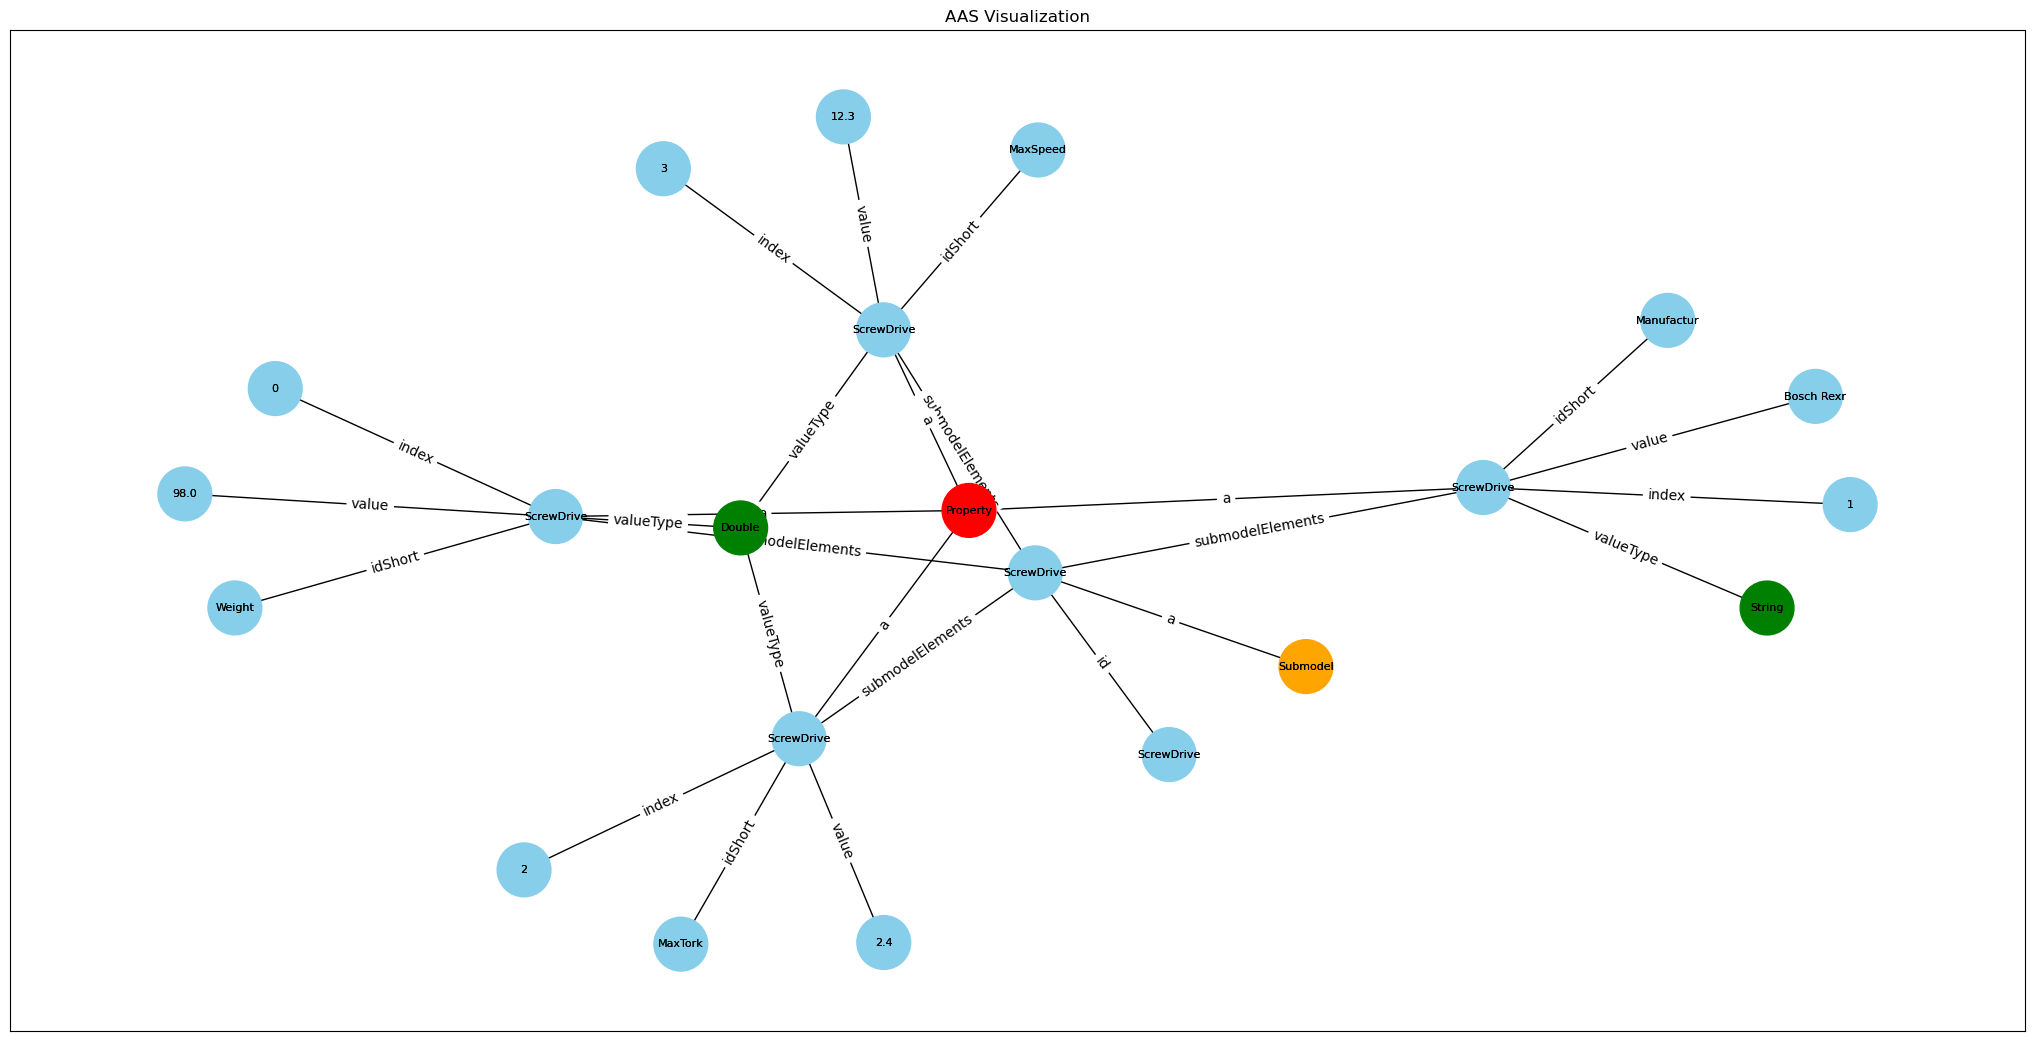

In [35]:
# identifier = str(uuid.uuid4())
identifier = "ScrewDriver001"
properties = [
    model.Property(
        id_short="Weight",
        value_type=model.datatypes.Double,
        value=float(random.randint(1, 100)),
    ),
    model.Property(
        id_short="Manufacturer",
        value_type=model.datatypes.String,
        value="Bosch Rexroth",
    ),
    model.Property(
        id_short="MaxTork",
        value_type=model.datatypes.Double,
        value=2.4,
    ),
    model.Property(
        id_short="MaxSpeed",
        value_type=model.datatypes.Double,
        value=12.3,
    ),
]
sm = generate_submodel(identifier, properties)
sm_json_string = json.dumps(sm, cls=basyx.aas.adapter.json.AASToJsonEncoder, indent=2)
# SubmodelElementChoice.model_rebuild()
graph, node = Submodel(**json.loads(sm_json_string)).to_rdf()
print(sm_json_string)
print(graph.serialize(format="turtle_custom"))

visualize_graph(graph)